# Computer Vision Ball Tracking Program

## 1. Basic details and visualization
Replace "/kaggle/input/video-ai-assignment/AI Assignment video.mp4" with the path of the video saved and change respective file locations

### 1.1 Total length of video in seconds

In [61]:
import cv2

def get_video_length(file_path):
    try:
        video_capture = cv2.VideoCapture(file_path)
        fps = video_capture.get(cv2.CAP_PROP_FPS)
        frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        total_seconds = frame_count / fps
        video_capture.release()
        return total_seconds
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage
video_path = "/kaggle/input/video-ai-assignment/AI Assignment video.mp4"
length_in_seconds = get_video_length(video_path)

if length_in_seconds is not None:
    print(f"The total length of the video is {length_in_seconds:.2f} seconds.")
else:
    print("Failed to retrieve video length.")


The total length of the video is 106.10 seconds.


### 1.2 Detection of each ball

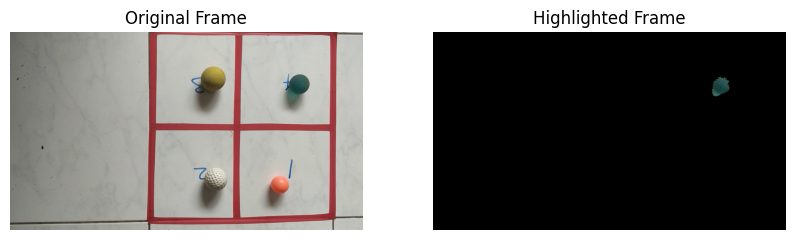

In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_ball(frame, lower_color, upper_color):
    # Convert the frame to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    balls=[]

    # Define a mask using the specified color range
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND operation to extract the color region
    result = cv2.bitwise_and(frame, frame, mask=mask)

    return result

# Load the video
video_path = '/kaggle/input/video-ai-assignment/AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to 8 seconds
cap.set(cv2.CAP_PROP_POS_MSEC, 14000)

# Read the frame at 8 seconds
ret, frame = cap.read()

# Define the color range for the ball (adjust these values based on your specific case)
lower_color = np.array([79, 95, 31]) 
upper_color = np.array([99, 195, 131]) 

# Highlight the ball in the frame
highlighted_frame = highlight_ball(frame, lower_color, upper_color)

# Display the original and highlighted frames using Matplotlib
plt.figure(figsize=(10, 5))

# Original Frame
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

# Highlighted Frame
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(highlighted_frame, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Frame')
plt.axis('off')

plt.show()

# Release the video capture object
cap.release()


### 1.3 Used ColorPicker to get RGB values of the ball colour and then converted to HSV

In [86]:
import numpy as np

# Given HSV values
hue = 49
saturation = 14
value = 61

# Convert to OpenCV format
opencv_hue = int((hue / 360) * 179)  # OpenCV's hue range is 0-179
opencv_saturation = int((saturation / 100) * 255)
opencv_value = int((value / 100) * 255)

lower_range = np.array([opencv_hue - 10, max(0, opencv_saturation - 50), max(0, opencv_value - 50)])
upper_range = np.array([opencv_hue + 10, min(255, opencv_saturation + 50), min(255, opencv_value + 50)])

print(*lower_range,sep=",")
print(*upper_range,sep=",")

14,0,105
34,85,205


### 1.4 The colour and quadrant values for reference

In [ ]:
# quadrant_coordinates = {
#     1: {'x': 1270, 'y': 550, 'w': 450, 'h': 430},
#     2: {'x': 800, 'y': 550, 'w': 415, 'h': 450},
#     3: {'x': 800, 'y': 20, 'w': 415, 'h': 470},
#     4: {'x': 1270, 'y': 20, 'w': 450, 'h': 470},
# }


# color_ranges = {
#     'white': [(14,0,95), (34,85,165)],
#     'orange': [(0,105,176), (16,205,255)],
#     'dark_blue': [(79, 95, 31), (99, 195, 131)],
#     'dark_yellow': [(13,103,120), (33,203,220)],
# }

### 1.5 Understanding the contour area

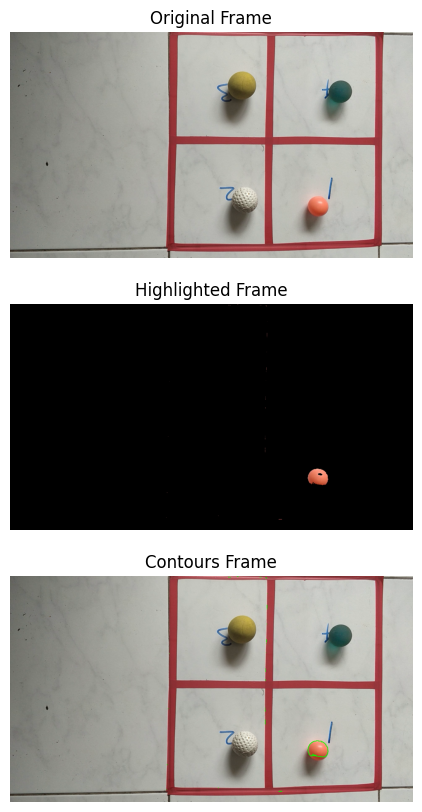

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_ball(frame, lower_color, upper_color):
    # Convert the frame to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define a mask using the specified color range
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Bitwise-AND operation to extract the color region
    result = cv2.bitwise_and(frame, frame, mask=mask)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Print the contour area values
    contour_areas = [cv2.contourArea(contour) for contour in contours]
    
    # Draw contours on the original frame
    contours_image = frame.copy()
    cv2.drawContours(contours_image, contours, -1, (0, 255, 0), 2)  # Green contours

    return result, contours_image

# Load the video
video_path = '/kaggle/input/video-ai-assignment/AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to 8 seconds
cap.set(cv2.CAP_PROP_POS_MSEC, 14000)

# Read the frame at 8 seconds
ret, frame = cap.read()

# Define the color range for the ball (adjust these values based on your specific case)
lower_color = np.array([0,105,176])
upper_color = np.array([16,205,255])

# Highlight the ball and draw contours on the original frame
highlighted_frame, contours_image = highlight_ball(frame, lower_color, upper_color)


# Display the original, highlighted, and contours frames using Matplotlib
plt.figure(figsize=(15, 10))

# Original Frame
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')
plt.axis('off')

# Highlighted Frame
plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(highlighted_frame, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Frame')
plt.axis('off')

# Contours Frame
plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Frame')
plt.axis('off')

plt.show()

# Release the video capture object
cap.release()


Centroid of Most Significant Contour: (938, 929)
Centroid in Quadrant 2


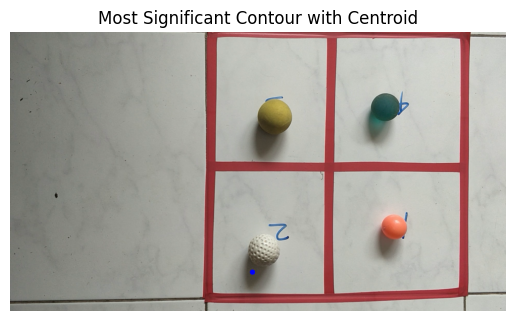

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

quadrant_coordinates = {
    1: {'x': 1270, 'y': 550, 'w': 450, 'h': 430},
    2: {'x': 800, 'y': 550, 'w': 415, 'h': 450},
    3: {'x': 800, 'y': 20, 'w': 415, 'h': 470},
    4: {'x': 1270, 'y': 20, 'w': 450, 'h': 470},
}

def check_coordinates_in_quadrants(coordinates, quadrants):
    for quadrant_number, coords in quadrants.items():
        x, y, w, h = coords.values()
        if x < coordinates[0] < x + w and y < coordinates[1] < y + h:
            print(f"Centroid in Quadrant {quadrant_number}")
            return quadrant_number
    print("Centroid not in any quadrant")
    return None

def find_most_significant_contour(frame, lower_color, upper_color, quadrants):
    # Convert the frame to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define a mask using the specified color range
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (optional)
    contours = [contour for contour in contours if cv2.contourArea(contour) > 100 and cv2.contourArea(contour)<26000]

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    

    if contours:
        # Get the most significant contour
        most_significant_contour = contours[0]
        

        # Calculate the centroid of the contour
        M = cv2.moments(most_significant_contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])

            print(f"Centroid of Most Significant Contour: ({cx}, {cy})")

            # Check if the centroid coordinates lie in any quadrant
            quadrant_number = check_coordinates_in_quadrants((cx, cy), quadrants)

            # Draw the centroid on the frame
            cv2.circle(frame, (cx, cy), 10, (255, 0, 0), -1)  # Blue circle

            return frame, quadrant_number

    return frame, None

# Load the video
video_path = '/kaggle/input/video-ai-assignment/AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to 8 seconds
cap.set(cv2.CAP_PROP_POS_MSEC, 60000)

# Read the frame at 8 seconds
ret, frame = cap.read()

# Define the color range for the ball (adjust these values based on your specific case)
lower_color = np.array([14,0,95])
upper_color = np.array([34,85,165])

# Find and print the centroid of the most significant contour
result_frame, quadrant_number = find_most_significant_contour(frame, lower_color, upper_color, quadrant_coordinates)

# Display the frame with the most significant contour centroid
plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
plt.title('Most Significant Contour with Centroid')
plt.axis('off')
plt.show()

# Release the video capture object
cap.release()


### 1.6 Detection of each ball in respective quadrants


Processing white color:
Area of Most Significant Contour (white): 25850.0
Centroid of Most Significant Contour: (938, 929)
Centroid in Quadrant 2


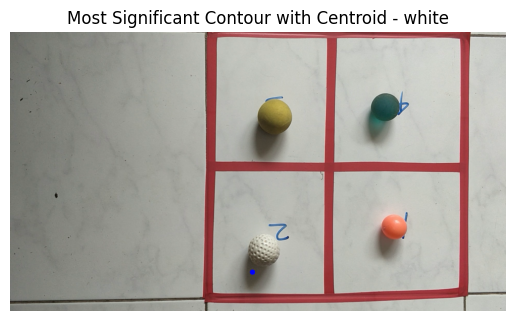


Processing orange color:
Area of Most Significant Contour (orange): 5339.0
Centroid of Most Significant Contour: (1489, 747)
Centroid in Quadrant 1


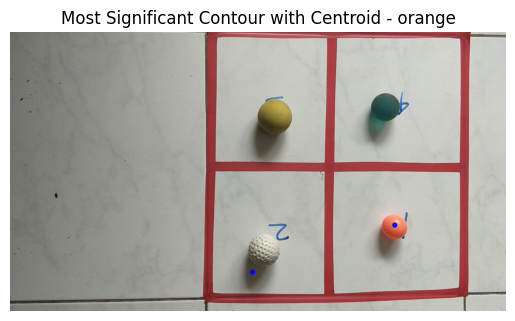


Processing dark_blue color:
Area of Most Significant Contour (dark_blue): 7574.5
Centroid of Most Significant Contour: (1442, 305)
Centroid in Quadrant 4


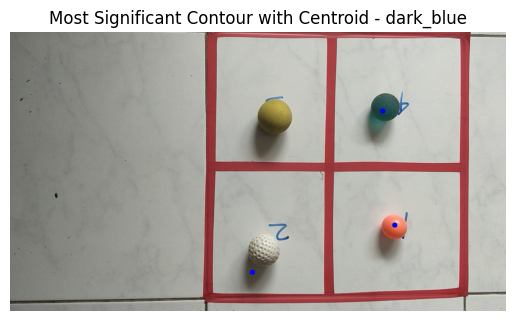


Processing dark_yellow color:
Area of Most Significant Contour (dark_yellow): 7086.5
Centroid of Most Significant Contour: (1034, 304)
Centroid in Quadrant 3


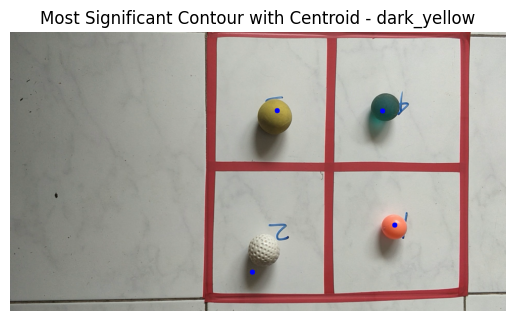

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

quadrant_coordinates = {
    1: {'x': 1270, 'y': 550, 'w': 450, 'h': 430},
    2: {'x': 800, 'y': 550, 'w': 415, 'h': 450},
    3: {'x': 800, 'y': 20, 'w': 415, 'h': 470},
    4: {'x': 1270, 'y': 20, 'w': 450, 'h': 470},
}


color_ranges = {
    'white': [(14,0,95), (34,85,165)],
    'orange': [(0,105,176), (16,205,255)],
    'dark_blue': [(79, 95, 31), (99, 195, 131)],
    'dark_yellow': [(13,103,120), (33,203,220)],
}

def check_coordinates_in_quadrants(coordinates, quadrants):
    for quadrant_number, coords in quadrants.items():
        x, y, w, h = coords.values()
        if x < coordinates[0] < x + w and y < coordinates[1] < y + h:
            print(f"Centroid in Quadrant {quadrant_number}")
            return quadrant_number
    print("Centroid not in any quadrant")
    return None

def find_most_significant_contour(frame, lower_color, upper_color, quadrants):
    # Convert the frame to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define a mask using the specified color range
    mask = cv2.inRange(hsv, lower_color, upper_color)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (optional)
    contours = [contour for contour in contours if cv2.contourArea(contour) > 3000 and cv2.contourArea(contour) <26000 ]

    # Sort contours by area in descending order
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if contours:
        # Get the most significant contour
        most_significant_contour = contours[0]

        # Calculate the centroid of the contour
        M = cv2.moments(most_significant_contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            print(f"Area of Most Significant Contour ({color_name}): {cv2.contourArea(most_significant_contour)}")


            print(f"Centroid of Most Significant Contour: ({cx}, {cy})")

            # Check if the centroid coordinates lie in any quadrant
            quadrant_number = check_coordinates_in_quadrants((cx, cy), quadrants)

            # Draw the centroid on the frame
            cv2.circle(frame, (cx, cy), 10, (255, 0, 0), -1)  # Blue circle

            return frame, quadrant_number

    return frame, None

# Load the video
video_path = '/kaggle/input/video-ai-assignment/AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)

# Set the frame position to 8 seconds
cap.set(cv2.CAP_PROP_POS_MSEC, 60000)

# Read the frame at 8 seconds
ret, frame = cap.read()

# Process each color
for color_name, color_range in color_ranges.items():
    lower_color = np.array(color_range[0])
    upper_color = np.array(color_range[1])

    print(f"\nProcessing {color_name} color:")
    
    # Find and print the centroid of the most significant contour for each color
    result_frame, quadrant_number = find_most_significant_contour(frame, lower_color, upper_color, quadrant_coordinates)

    # Display the frame with the most significant contour centroid
    plt.imshow(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Most Significant Contour with Centroid - {color_name}')
    plt.axis('off')
    plt.show()

# Release the video capture object
cap.release()


## 2. Processing the video after getting quadrant and colour values

### Saving the initial detection of balls in respective quadrants
Capturing frames at every 1 second of the video

In [94]:
import cv2
import numpy as np
import csv

quadrant_coordinates = {
    1: {'x': 1270, 'y': 550, 'w': 450, 'h': 430},
    2: {'x': 800, 'y': 550, 'w': 415, 'h': 450},
    3: {'x': 800, 'y': 20, 'w': 415, 'h': 470},
    4: {'x': 1270, 'y': 20, 'w': 450, 'h': 470},
}

color_ranges = {
    'white': [(14,0,95), (34,85,165)],
    'orange': [(0,105,176), (16,205,255)],
    'dark_blue': [(79, 95, 31), (99, 195, 131)],
    'dark_yellow': [(13,103,120), (33,203,220)],
}

def check_coordinates_in_quadrants(coordinates, quadrants):
    for quadrant_number, coords in quadrants.items():
        x, y, w, h = coords.values()
        if x < coordinates[0] < x + w and y < coordinates[1] < y + h:
            
            return quadrant_number
    
    return None

def find_most_significant_contour(frame, lower_color, upper_color, quadrants):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_color, upper_color)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = [contour for contour in contours if cv2.contourArea(contour) > 3000 and cv2.contourArea(contour) < 26000]
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    if contours:
        most_significant_contour = contours[0]
        M = cv2.moments(most_significant_contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            quadrant_number = check_coordinates_in_quadrants((cx, cy), quadrants)
            return quadrant_number

    return None

video_path = '/kaggle/input/video-ai-assignment/AI Assignment video.mp4'
cap = cv2.VideoCapture(video_path)
output_csv = 'output.csv'

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['Timestamp', 'Quadrant Number', 'Ball Colour']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    total_time = int(length_in_seconds) * 1000

    for timestamp in range(1000, total_time, 1000):
        
        cap.set(cv2.CAP_PROP_POS_MSEC, timestamp)
        ret, frame = cap.read()

        for color_name, color_range in color_ranges.items():
            lower_color = np.array(color_range[0])
            upper_color = np.array(color_range[1])
            quadrant_number = find_most_significant_contour(frame, lower_color, upper_color, quadrant_coordinates)
            
            if quadrant_number is not None:
                writer.writerow({'Timestamp': timestamp, 'Quadrant Number': quadrant_number, 'Ball Colour': color_name})

# Release the video capture object outside the loop
cap.release()


## 3. Processing the saved data for relevant output

In [4]:
import pandas as pd

### 3.1 Removing consecutive entries of same data

In [95]:
# Load the CSV file into a DataFrame
input_csv = '/kaggle/working/output.csv'
output_csv = 'output_filtered.csv'

df = pd.read_csv(input_csv)

outer_index = 0

# Outer loop: Traverse each row
while outer_index < len(df):
    row = df.iloc[outer_index]

    # Initialize index for inner loop (start from the next row)
    inner_index = outer_index + 1


    # Inner loop: Check rows with the same timestamp and quadrant after the current row
    while inner_index < len(df):
        next_row = df.iloc[inner_index]
        


        # Check if the timestamp and quadrant are the same
        if (row['Timestamp'] == next_row['Timestamp']) and (row['Quadrant Number'] == next_row['Quadrant Number']):
            # Check if the color is white
            if next_row['Ball Colour'] == 'white':
                # Drop the row if the color is white
                df = df.drop(next_row.name)
            else:
                df = df.drop(row.name)
                row=next_row
        if (row['Timestamp'] != next_row['Timestamp']):
            break

        inner_index += 1

    outer_index += 1


# Save the filtered DataFrame to a new CSV file
print(df)


     Timestamp  Quadrant Number  Ball Colour
0         3000                3  dark_yellow
2         4000                3  dark_yellow
3         5000                2        white
4         5000                3  dark_yellow
5         6000                2        white
..         ...              ...          ...
235     104000                3  dark_yellow
236     105000                2        white
237     105000                1       orange
238     105000                4    dark_blue
239     105000                3  dark_yellow

[233 rows x 3 columns]


In [96]:
df.to_csv(output_csv, index=False)

### 3.2 Removing entries with same quadrant number till the number changes for each colour
Program was detecting continous presence of the ball in a quadrant, hard coded for all 4 colour values

In [98]:
import csv

# Replace 'your_input_file.csv' and 'your_output_file.csv' with the actual file paths
input_csv_file_path = '/kaggle/working/output_filtered.csv'
output_csv_file_path = '/kaggle/working/each_colour.csv'

colours_quad = [0] * 4
empty_list = []
latest_quad = [empty_list.copy() for _ in range(4)]

# Open the input CSV file
with open(input_csv_file_path, 'r') as input_csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(input_csv_file)
    
    # Open the output CSV file for writing
    with open(output_csv_file_path, 'w', newline='') as output_csv_file:
        # Create a CSV writer object
        csv_writer = csv.writer(output_csv_file)
        # Write column headings to the output file
        csv_writer.writerow(['Timestamp', 'Quadrant', 'Colour'])
        
        i = 0
        # Iterate through each row in the input CSV file
        for row in csv_reader:
            # Process each row as needed
            i += 1
            if i == 1:
                continue

            if row[2] == 'white':
                if colours_quad[0] == 0:
                    csv_writer.writerow(row)
                    colours_quad[0] = row[1]
                if colours_quad[0] == row[1] or colours_quad[0] == 0:
                    latest_quad[0] = row
                else:
                    csv_writer.writerow(latest_quad[0])
                    csv_writer.writerow(row)
                    colours_quad[0] = row[1]
        

The following cell could be used for execution for all 4 colours at once

In [29]:
# import csv

# # Replace 'your_input_file.csv' and 'your_output_file.csv' with the actual file paths
# input_csv_file_path = '/kaggle/working/output_filtered.csv'
# output_csv_file_path = '/kaggle/working/preprocessed.csv'

# colours_quad = [0] * 4
# empty_list = []
# latest_quad = [empty_list.copy() for _ in range(4)]

# # Open the input CSV file
# with open(input_csv_file_path, 'r') as input_csv_file:
#     # Create a CSV reader object
#     csv_reader = csv.reader(input_csv_file)
    
#     # Open the output CSV file for writing
#     with open(output_csv_file_path, 'w', newline='') as output_csv_file:
#         # Create a CSV writer object
#         csv_writer = csv.writer(output_csv_file)
#         # Write column headings to the output file
#         csv_writer.writerow(['Timestamp', 'Quadrant', 'Colour'])
        
#         i = 0
#         # Iterate through each row in the input CSV file
#         for row in csv_reader:
#             # Process each row as needed
#             i += 1
#             if i == 1:
#                 continue

#             if row[2] == 'white':
#                 if colours_quad[0] == 0:
#                     csv_writer.writerow(row)
#                     colours_quad[0] = row[1]
#                 if colours_quad[0] == row[1] or colours_quad[0] == 0:
#                     latest_quad[0] = row
#                 else:
#                     csv_writer.writerow(latest_quad[0])
#                     csv_writer.writerow(row)
#                     colours_quad[0] = row[1]
#             elif row[2] == 'dark_yellow':
#                 if colours_quad[1] == 0:
#                     csv_writer.writerow(row)
#                     colours_quad[1] = row[1]
#                 if colours_quad[1] == row[1] or colours_quad[1] == 0:
#                     latest_quad[1] = row
#                 else:
#                     csv_writer.writerow(latest_quad[1])
#                     csv_writer.writerow(row)
#                     colours_quad[1] = row[1]
#             elif row[2] == 'dark_blue':
#                 if colours_quad[2] == 0:
#                     csv_writer.writerow(row)
#                     colours_quad[2] = row[1]
#                 if colours_quad[2] == row[1] or colours_quad[2] == 0:
#                     latest_quad[2] = row
#                 else:
#                     csv_writer.writerow(latest_quad[2])
#                     csv_writer.writerow(row)
#                     colours_quad[2] = row[1]
#             elif row[2] == 'orange':
#                 if colours_quad[3] == 0:
#                     csv_writer.writerow(row)
#                     colours_quad[3] = row[1]
#                 if colours_quad[3] == row[1] or colours_quad[3] == 0:
#                     latest_quad[3] = row
#                 else:
#                     csv_writer.writerow(latest_quad[3])
#                     csv_writer.writerow(row)
#                     colours_quad[3] = row[1]

# # Print a message indicating the successful writing of the output CSV file
# print(f"Output written to {output_csv_file_path}")


Output written to /kaggle/working/preprocessed.csv


Example output after processing data of a colour

In [105]:
cdf=pd.read_csv("/kaggle/working/each_colour.csv")
print(cdf)

    Timestamp  Quadrant Colour
0        5000         2  white
1       15000         2  white
2       25000         4  white
3       33000         4  white
4       34000         1  white
5       33000         4  white
6       35000         4  white
7       54000         4  white
8       60000         2  white
9       64000         2  white
10      74000         3  white
11      86000         3  white
12      94000         2  white
13      99000         2  white
14     100000         1  white
15      99000         2  white
16     101000         2  white


White ball was generating noise because of white background so it needed a separate further processing

In [117]:
#white special case
import csv

# Replace 'your_file.csv' with the actual file path of your CSV file
csv_file_path = '/kaggle/working/each_colour.csv'
wdf=cdf
# Open the CSV file
temp=0
current=wdf.iloc[0]
while temp < len(wdf):
    temp += 1
    if temp<len(wdf):
        new=wdf.iloc[temp]
    if new[1]==current[1]:
        temp += 1
    else:
        wdf = wdf.drop(current.name)
    if temp<len(wdf):
        current=wdf.iloc[temp]
        
new_data = []
colours_quad = [0] * 4
empty_list = []
latest_quad = [empty_list.copy() for _ in range(4)]
for index, row in wdf.iterrows():
    # Process each row as needed


    if row[2] == 'white':
        if colours_quad[0] == 0:
            new_data.append(row)
            colours_quad[0] = row[1]
        if colours_quad[0] == row[1] or colours_quad[0] == 0:
            latest_quad[0] = row
        else:
            new_data.append(latest_quad[0])
            new_data.append(row)
            colours_quad[0] = row[1]

# Creating a new DataFrame
new_df = pd.DataFrame(new_data, columns=wdf.columns)
print(new_df)

    Timestamp  Quadrant Colour
0        5000         2  white
1       15000         2  white
2       25000         4  white
7       54000         4  white
8       60000         2  white
9       64000         2  white
10      74000         3  white
11      86000         3  white
12      94000         2  white


### 3.3 Adding entry and exit for the ball
Includes the further processing required by colours other than white

In [118]:
import csv

# Replace 'your_file.csv' with the actual file path of your CSV file
csv_file_path = '/kaggle/working/each_colour.csv'
df=new_df
# Open the CSV file
temp=1
current=df.iloc[0]
n = df["Timestamp"].nunique()
while temp < len(df):

    next_row = df.iloc[temp]

    if next_row[0]<current[0]:
        df = df.drop(next_row.name)
        df = df.drop(current.name)
    if temp<len(df):
        current=df.iloc[temp]
    temp += 1
df['Type'] = ''
df = df.reset_index()
# Use a loop to add entries for every row, alternating between "entry" and "exit"
entry_exit_sequence = ["entry", "exit"] * (len(df) // 2) + ["entry"] * (len(df) % 2)

for i in range(len(df)):
    df.at[i, 'Type'] = entry_exit_sequence[i]
df.drop('index', axis=1, inplace=True)
print(df)

   Timestamp  Quadrant Colour   Type
0       5000         2  white  entry
1      15000         2  white   exit
2      25000         4  white  entry
3      54000         4  white   exit
4      60000         2  white  entry
5      64000         2  white   exit
6      74000         3  white  entry
7      86000         3  white   exit
8      94000         2  white  entry


### 3.4 Concatenating all 4 DataFrames

In [22]:
empty_df = pd.DataFrame()

In [119]:
result_df = pd.concat([df, result_df], ignore_index=True)
print(result_df)

    Timestamp  Quadrant       Colour   Type
0        5000         2        white  entry
1       15000         2        white   exit
2       25000         4        white  entry
3       54000         4        white   exit
4       60000         2        white  entry
5       64000         2        white   exit
6       74000         3        white  entry
7       86000         3        white   exit
8       94000         2        white  entry
9       14000         1       orange  entry
10      20000         1       orange   exit
11      27000         2       orange  entry
12      41000         2       orange   exit
13      53000         1       orange  entry
14      63000         1       orange   exit
15      79000         4       orange  entry
16      85000         4       orange   exit
17      90000         1       orange  entry
18       3000         3  dark_yellow  entry
19      29000         3  dark_yellow   exit
20      38000         1  dark_yellow  entry
21      43000         1  dark_ye

Sorting according to timestamp

In [123]:
# Sorting in ascending order
df_sorted = result_df.sort_values(by='Timestamp')

# Sorting in descending order
# df_sorted = df.sort_values(by='your_column_name', ascending=False)

# Resetting the index if needed
df_sorted.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(df_sorted)

    Timestamp  Quadrant       Colour   Type
0        3000         3  dark_yellow  entry
1        5000         2        white  entry
2       10000         4    dark_blue  entry
3       14000         1       orange  entry
4       15000         2        white   exit
5       18000         4    dark_blue   exit
6       20000         1       orange   exit
7       25000         4        white  entry
8       27000         2       orange  entry
9       29000         3  dark_yellow   exit
10      34000         3    dark_blue  entry
11      38000         1  dark_yellow  entry
12      41000         2       orange   exit
13      43000         1  dark_yellow   exit
14      46000         3    dark_blue   exit
15      50000         3  dark_yellow  entry
16      53000         1       orange  entry
17      54000         4        white   exit
18      55000         4    dark_blue  entry
19      60000         2        white  entry
20      63000         1       orange   exit
21      64000         4    dark_

Converting milliseconds to appropriate time stamp

In [124]:
from datetime import datetime

# Assuming df is your DataFrame
# Replace 'your_dataframe' with the actual DataFrame variable

# Convert milliseconds to seconds
df_sorted['Timestamp'] = df_sorted['Timestamp'] / 1000

# Convert the 'Timestamp' column to datetime format
df_sorted['Timestamp'] = df_sorted['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%H:%M:%S'))

# Display the modified DataFrame
print(df_sorted)

   Timestamp  Quadrant       Colour   Type
0   00:00:03         3  dark_yellow  entry
1   00:00:05         2        white  entry
2   00:00:10         4    dark_blue  entry
3   00:00:14         1       orange  entry
4   00:00:15         2        white   exit
5   00:00:18         4    dark_blue   exit
6   00:00:20         1       orange   exit
7   00:00:25         4        white  entry
8   00:00:27         2       orange  entry
9   00:00:29         3  dark_yellow   exit
10  00:00:34         3    dark_blue  entry
11  00:00:38         1  dark_yellow  entry
12  00:00:41         2       orange   exit
13  00:00:43         1  dark_yellow   exit
14  00:00:46         3    dark_blue   exit
15  00:00:50         3  dark_yellow  entry
16  00:00:53         1       orange  entry
17  00:00:54         4        white   exit
18  00:00:55         4    dark_blue  entry
19  00:01:00         2        white  entry
20  00:01:03         1       orange   exit
21  00:01:04         4    dark_blue   exit
22  00:01:0

### 3.5 Saving the final result in a neat tabulated format

In [126]:
from tabulate import tabulate
# Format the table
table = tabulate(df_sorted, headers='keys', tablefmt='pretty', showindex=False)

# Save the formatted table to a .txt file
with open('output.txt', 'w') as file:
    file.write(table)